6. 분류 예측의 불확실성 추정

- 어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지, 정확한지 확신하는지가 중요한 경우가 많다.
- 실제 어플리케이션에서는 오류의 종류에 따라 전혀 다른 결과를 만든다.
- ex) 암을 진료하는 어플리케이션의 경우, TP, TN, FP, FN의 4가지 상황일때 FP(거짓 양성) 인경우 

  추가적인 지료를 요구하지만, FP(거짓 음성) 인경우 심각한 질병을 치료하지 못하게 만들 수 있다. 따라서 불확실성의 판단은 매우 중요하다

- scikit-learn에서 제공하는 분류모델에서는 불확실성을 추정할 수 있는 함수 decision_function과 predict_proba가 있다

  ( 두가지를 모두 제공하거나, 둘 중 하나만 제공 )

In [7]:
#인위적으로 만든 2차원 데이터셋을 이용해 그레디언트 분류기의 decisio, proba 메서드 확인

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

X,y = make_circles(noise=0.25, factor = 0.5 , random_state=1)

y_named = np.array(['blue','red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named,y,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
print("X_test.shape:",X_test.shape)
print('결정 함수 결과 형태 :', gbrt.decision_function(X_test).shape)

#결정함수 결과 중 앞부분
print("결정함수 \n", gbrt.decision_function(X_test)[:6])
#결정함수의 부호를 보고 예측결과 판단

X_test.shape: (25, 2)
결정 함수 결과 형태 : (25,)
결정함수 
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [11]:
print("임계치와 결정함수 결과 비교 :\n",gbrt.decision_function(X_test)>0)
print('예측:\n',gbrt.predict(X_test))

#이진분류에서 음성클래스는 항상 classes_속성의 첫번째 원소, 양성은 두번째 원소

임계치와 결정함수 결과 비교 :
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [12]:
#predict 함수의 결과를 완전히 재현하려면 classes_속성을 사용하면 된다.

#불리언(true, false) 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) >0).astype(int)

#classes에 인덱스로 이용
pred = gbrt.classes_[greater_zero]

#결과값 비교
print('예측결과 비교', np.all(pred==gbrt.predict(X_test)))

예측결과 비교 True


In [14]:
#decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다. 
#현재 예제는 임의의 값이라 출력 범위를 이해하긴 어렵다.

decision_function = gbrt.decision_function(X_test)
print('결정함수 최솟값: {:.2f} 최댓값:{:2f}'.format(np.min(decision_function),np.max(decision_function)))

결정함수 최솟값: -7.69 최댓값:4.289867


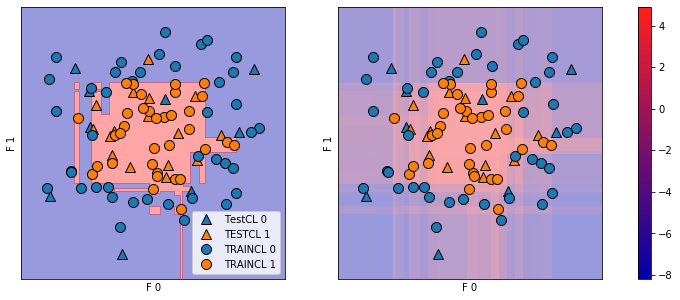

In [20]:
#decision_functino 시각화
import matplotlib.pyplot as plt
import mglearn

fig, axes= plt.subplots(1,2, figsize =(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill= True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha =.4, cm=mglearn.ReBl)

for ax in axes :
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("F 0")
    ax.set_ylabel("F 1")
    
cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['TestCL 0','TESTCL 1',"TRAINCL 0",'TRAINCL 1'])

#예측 결과뿐 아니라, 분류기가 얼마나 정확한지 추가 정보를 얻게 되지만, 결정경계 구분은 어렵다.

- predict_proba의 출력은 각 클래스에 대한 확률 ( decision_function 보다 이해하기 쉽고 이값의 크기는 이진분류에서 항상 n_samples, 2 이다. )

In [21]:
print('확률값의 형태 :', gbrt.predict_proba(X_test).shape)

확률값의 형태 : (25, 2)


In [23]:
#각 행의 첫째 원소는 첫번째 클래스일 확률, 두번째 원소는 두번째 클래스일 확률 ( 각 원소는 0~1사이 값이며 모든 원소의 합은 1)
print("예측확률:\n",gbrt.predict_proba(X_test[:6]))

예측확률:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


- 데이터에 있는 불확실성이 예측확률에 반영되려면 모델과 매개변수 설정이 중요하다
- 과대적합 된 모델은 잘못된 예측이더라도 예측의 확신이 강하다
- 일반적으로 복잡도가 낮은 모델은 예측의 불확실성이 많고 불확실성과 정확도가 동등하면 모델이 보정되었다고 한다.
  
  ( 보정된 모델에서 70%의 확신을 가진 예측은 70%의 정확도를 낸다. )

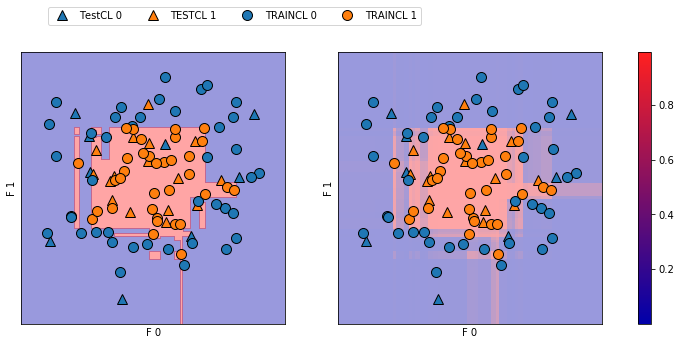

In [24]:
# predict_proba로 시각화 
fig, axes= plt.subplots(1,2, figsize =(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill= True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha =.4, cm=mglearn.ReBl ,function='predict_proba')

for ax in axes :
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1],y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train, markers='o', ax=ax)
    ax.set_xlabel("F 0")
    ax.set_ylabel("F 1")
    
cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['TestCL 0','TESTCL 1',"TRAINCL 0",'TRAINCL 1'], ncol=4, loc=(.1,1.1))

# 이 그래프는 decision 매서드 보다 경계가 뚜렷하며, 불확실성이 있는 작은 영역도 잘 확인 가능.

다중 분류에서의 불확실성 

- decision_function, predict_proba 매서드는 다중분류에서도 이용가능하다. 
- 다중 분류에서 decision_function와 predict_proba 결과값의 크기는 (n_samples, n_classes)
- 열이 n_classes개일 경우 열을 가로질러 argmax함수를 적용해 예측 결과를 재현 할 수 있지만

  클래스가 문자열이거나, 정수형을 이용하지만 연속적이지 않고 0부터 시작하지 않을 수 있다.
  
  predict의 결과ㅏ와 비교하려면 분류기의 classes_속성을 이용해 클래스의 실제 이름을 얻어야 한다.

In [27]:
#iris 데이터셋 적용

from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state =0)
gbrt.fit(X_train, y_train)

print("결정함수 결과 형태 ", gbrt.decision_function(X_test).shape)
print('결정함수 결과 ' , gbrt.decision_function(X_test)[:6,:])
#결과값에서 수치가 크면 그 클래스일가능성이 크고 낮으면 가능성이 낮다. 큰값을 찾아 예측결과 재현 가능

결정함수 결과 형태  (38, 3)
결정함수 결과  [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [28]:
#예측결과 재현
print('가장 큰 결정함수의 인덱스:\n',np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측\n",gbrt.predict(X_test))

가장 큰 결정함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [30]:
#predict_proba는 이진분류와 출력값 크기는 같고 각 데이터 포인트에서 클래스 확률의 합은 1
print("예측 확률:\n",gbrt.predict_proba(X_test)[:6])
print("합",gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
합 [1. 1. 1. 1. 1. 1.]


In [31]:
#예측결과 재현
print('가장 큰 예측 확률의 인덱스:\n',np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측\n",gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [40]:
named_target.shape

(112,)

In [43]:
#classes_속성을 이용해 클래스의 실제이름 얻기
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#데이터 셋의 타깃을 클래스 이름으로 나타내기 
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print("훈련 데이터에 있는 클래스 종류", logreg.classes_)
print("예측",logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정함수의 인덱스:", argmax_dec_func[:10])
print('인텍스를 클래스에 연결', logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류 ['setosa' 'versicolor' 'virginica']
예측 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인텍스를 클래스에 연결 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
